# The neighbourhoods in Frederiction, New Brunswick, Canada


In [37]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import requests

In [39]:
df= pd.read_csv('Crime_by_neighbourhood_2017___Crime_par_quartier_2017.csv')
df.head()

,Neighbourhood,From_Date,To_Date,Crime_Code,Crime_Type,Ward,City,FID
0,Fredericton South,2017/01/05 00:00:00+00,2017/01/26 00:00:00+00,2120,B&E NON-RESIDNCE,7,Fredericton,1
1,Fredericton South,2017/03/04 00:00:00+00,2017/03/06 00:00:00+00,2120,B&E NON-RESIDNCE,7,Fredericton,2
2,Fredericton South,2017/05/07 00:00:00+00,1970/01/01 00:00:00+00,2120,B&E NON-RESIDNCE,12,Fredericton,3
3,Fredericton South,2017/06/20 00:00:00+00,2017/06/21 00:00:00+00,2120,B&E NON-RESIDNCE,12,Fredericton,4
4,Fredericton South,2017/07/09 00:00:00+00,2017/07/10 00:00:00+00,2120,B&E NON-RESIDNCE,7,Fredericton,5


In [40]:
# 2 columns will be removed because the data is not datetime bound.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Neighbourhood  1460 non-null   object
 1   From_Date      1460 non-null   object
 2   To_Date        1460 non-null   object
 3   Crime_Code     1460 non-null   int64 
 4   Crime_Type     1460 non-null   object
 5   Ward           1460 non-null   int64 
 6   City           1460 non-null   object
 7   FID            1460 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 91.4+ KB


In [42]:
df.drop(["From_Date","To_Date"], axis = 1, inplace = True)

In [43]:
df.head()

,Neighbourhood,Crime_Code,Crime_Type,Ward,City,FID
0,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,1
1,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,2
2,Fredericton South,2120,B&E NON-RESIDNCE,12,Fredericton,3
3,Fredericton South,2120,B&E NON-RESIDNCE,12,Fredericton,4
4,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,5


# Quick Analysis on the neighbourhoods with the most crime¶


1) What are the different crime types and how many are they? 2) How many wards are in the city? 3) How many Neighbourhoods are in the city?

In [45]:
#1
df["Crime_Type"].unique()
#From here we can notice that there is a blank cell so we will have to see why it is blank

array(['B&E NON-RESIDNCE', 'MISCHIEF TO PROP', 'THEFT BIKE<$5000',
       'THEFT FROM MV < $5000', 'THEFT FROM MV > $5000',
       'THEFT OTH <$5000', 'ARSON BY NEG', 'B&E OTHER', 'B&E RESIDENCE',
       'MOTOR VEH THEFT', 'ARSON-DAM.PROP.', 'B&E STEAL FIREAR',
       'THEFT OTH >$5000', 'ARSON', 'MISCHIEF-DATA', 'MISCHIEF OBS USE',
       'THEFT OVER $5000', 'THEFT,BIKE>$5000', ' '], dtype=object)

In [46]:
#1b)
df["Crime_Type"].nunique()

19

In [47]:
df[df["Crime_Type"] == ' ']
#So these 4 neighbourhoods do not have any crime rates. Naturally the should be dropped but they will be used as a litmus test

,Neighbourhood,Crime_Code,Crime_Type,Ward,City,FID
993,Knowledge Park,0,,0,,994
999,Grasse Circle,0,,0,,1000
1134,Fredericton South,0,,0,,1135
1449,Wesbett / Case,0,,0,,1450


In [49]:
#2) There are 13 Wards 
df.Ward.nunique()

13

In [51]:
#3) How many Neighbourhoods are in the city? Answer is 66.
df.Neighbourhood.nunique()

66

In [52]:
CN = df.groupby("Neighbourhood").count()["Crime_Type"]
CN

Neighbourhood
Barkers Point               47
Brookside                   54
Brookside Estates            9
Brookside Mini Home Park     5
College Hill                41
                            ..
Wesbett / Case               1
West Hills                   5
Williams / Hawkins Area     17
Woodstock Road              41
Youngs Crossing             16
Name: Crime_Type, Length: 66, dtype: int64

In [53]:
CND = pd.DataFrame(CN)
CND.head()

,Crime_Type
Neighbourhood,
Barkers Point,47
Brookside,54
Brookside Estates,9
Brookside Mini Home Park,5
College Hill,41


In [54]:
CND.reset_index(inplace = True)

In [55]:
CND.columns = ["Neighbourhood","Frequency"]

In [56]:
CND.nlargest(5,"Frequency")

,Neighbourhood,Frequency
40,Platt,198
10,Downtown,127
38,North Devon,113
13,Fredericton South,85
42,Prospect,81


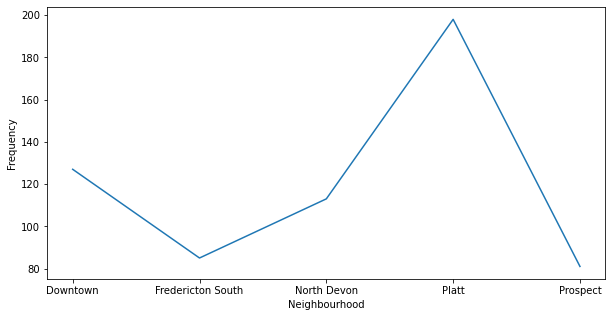

In [57]:
#The top 5 Neighbourhoods by crime frequency i.e the target market
plt.figure(figsize = (10,5))
Chart = sns.lineplot(x = "Neighbourhood", y = "Frequency", data = CND.nlargest(5,"Frequency"))

In [58]:
CND.describe()

,Frequency
count,66.000000
mean,22.121212
std,34.879359
min,1.000000
25%,3.000000
50%,9.000000
75%,23.250000
max,198.000000


In [60]:
CT = df.groupby("Crime_Type").size()

In [62]:
CTD = pd.DataFrame(CT)
CTD.reset_index(inplace = True)

In [63]:
CTD.columns = ["Crime", "Frequency"]

In [64]:
# It is clear that the most common type of crime in Ferediction is theft less than $5,000 
CTD.sort_values("Frequency", ascending = False)

,Crime,Frequency
15,THEFT OTH <$5000,458
13,THEFT FROM MV < $5000,356
9,MISCHIEF TO PROP,246
6,B&E RESIDENCE,151
12,THEFT BIKE<$5000,63
5,B&E OTHER,58
4,B&E NON-RESIDNCE,51
11,MOTOR VEH THEFT,40
16,THEFT OTH >$5000,9
14,THEFT FROM MV > $5000,5


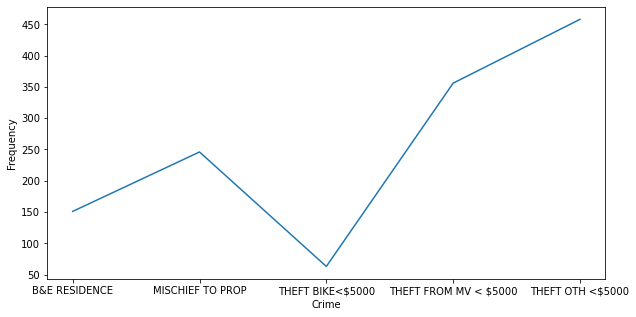

In [65]:
plt.figure(figsize = (10,5))
Chart = sns.lineplot(x = "Crime", y = "Frequency", data = CTD.nlargest(5,"Frequency"))

In [66]:
# we have the top 5 crimes and top 5 neighbourhoods, let's see the top crimes in these neighbourhoods

In [67]:
Top_5 = CND.nlargest(5,"Frequency").Neighbourhood.unique()

In [69]:
Top_5 = ['Platt', 'Downtown', 'North Devon', 'Fredericton South',
       'Prospect']

In [70]:
#Create a Dataframe for the top 5 Neighbourhoods
Top_5DF = df[df["Neighbourhood"].isin(Top_5)]

In [71]:
Top_5DF.head()

,Neighbourhood,Crime_Code,Crime_Type,Ward,City,FID
0,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,1
1,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,2
2,Fredericton South,2120,B&E NON-RESIDNCE,12,Fredericton,3
3,Fredericton South,2120,B&E NON-RESIDNCE,12,Fredericton,4
4,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,5


In [72]:
df1 = Top_5DF.groupby(["Neighbourhood","Crime_Type"]).size()

In [75]:
df1 = pd.DataFrame(df1)

In [76]:
df1.reset_index(inplace = True)

In [77]:
df1.head()

,Neighbourhood,Crime_Type,0
0,Downtown,ARSON,1
1,Downtown,ARSON-DAM.PROP.,1
2,Downtown,B&E NON-RESIDNCE,7
3,Downtown,B&E RESIDENCE,3
4,Downtown,MISCHIEF TO PROP,29


In [79]:
df1.columns = ["Neighbourhood","Crime","Frequency"]

In [80]:
df1.head()

,Neighbourhood,Crime,Frequency
0,Downtown,ARSON,1
1,Downtown,ARSON-DAM.PROP.,1
2,Downtown,B&E NON-RESIDNCE,7
3,Downtown,B&E RESIDENCE,3
4,Downtown,MISCHIEF TO PROP,29


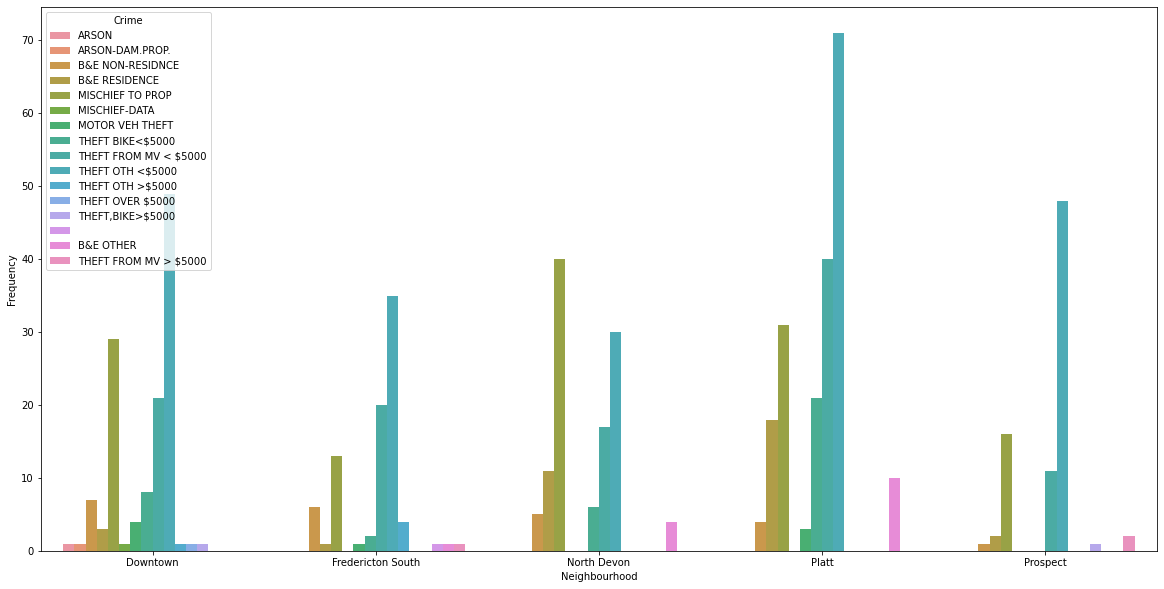

In [81]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Neighbourhood', y = "Frequency", data = df1, hue = "Crime")

# North Devon Neighbourhood is the best place for us to start advertising our home alarm soundsystem while Platt is for our wearables division

In [82]:
from sklearn.cluster import KMeans

In [83]:
df1.head()

,Neighbourhood,Crime,Frequency
0,Downtown,ARSON,1
1,Downtown,ARSON-DAM.PROP.,1
2,Downtown,B&E NON-RESIDNCE,7
3,Downtown,B&E RESIDENCE,3
4,Downtown,MISCHIEF TO PROP,29


# Now we have to segment the various neighbourhoods into categories to identify which Neighbourhoods have similar features that may have been missed

In [84]:
kclusters = 3

CrimeClusters = df1.drop(['Neighbourhood',"Crime"], axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(CrimeClusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 2])

In [85]:
df1.insert(0, 'ClusterLabels', kmeans.labels_)

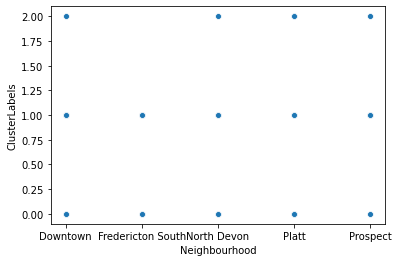

In [86]:
sns.scatterplot(x = "Neighbourhood", y = "ClusterLabels", data = df1)

In [87]:
df1.groupby('ClusterLabels').mean()

,Frequency
ClusterLabels,
0,23.800000
1,3.806452
2,49.600000


# the top 5 neighbourhoods have very similar features for their crime rates hence we can focus on anyone as a fertile market.